<a href="https://colab.research.google.com/github/deep100/mldata/blob/master/KMC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/deep100/mldata/master/income.csv")
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


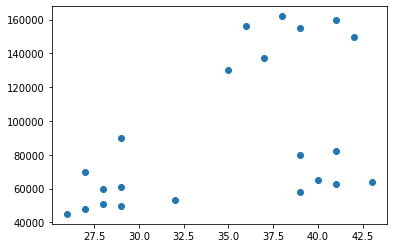

In [4]:
plt.scatter(df['Age'],df['Income($)'])

In [0]:
scaler=MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)']=scaler.transform(df[['Income($)']])
scaler.fit(df[['Age']])
df['Age']=scaler.transform(df[['Age']])

In [0]:
km=KMeans(n_clusters=3)
ypred=km.fit_predict(df[['Age','Income($)']])
df['Cluster']=ypred
df

In [0]:
df1=df[df.Cluster==0]
df2=df[df.Cluster==1]
df3=df[df.Cluster==2]

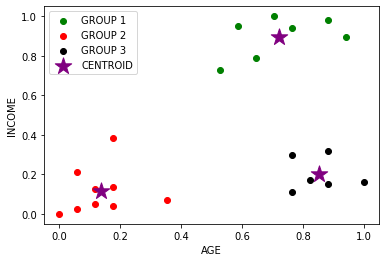

In [16]:
plt.scatter(df1.Age,df1['Income($)'],color='g',label="GROUP 1")
plt.scatter(df2.Age,df2['Income($)'],color='r',label="GROUP 2")
plt.scatter(df3.Age,df3['Income($)'],color='k',label="GROUP 3")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',s=300,label="CENTROID")
plt.xlabel("AGE")
plt.ylabel("INCOME")
plt.legend()
plt.show()

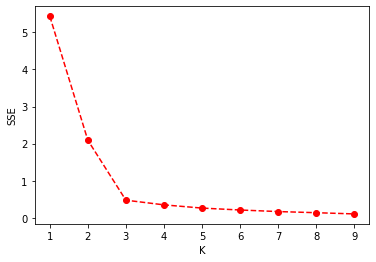

In [22]:
krng=range(1,10)
sse=[]
for k in krng:
    km=KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(krng,sse,"ro--")
plt.show()